### GRIPAUGUST21
### AUTHOR: ALIFATHIMA ABSANA H
### TASK-1 : PREDICTION USING SUPERVISED MACHINE LEARNING


### INTRODUCTION:
 Supervised learning is a subcategory of machine learning and artificial intelligence. It is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately.The linear regression model is a classical Supervised learning Algorithm.The goal of linear regression is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable.The case of one independent variable is called simple linear regression.

### OBJECTIVE:
i) To Predict the Percentage of the students based on the no of study hours     
ii) To predict the precentage of student who studies for 9.25 hrs/day


#### ANALYSIS:

In [2]:
import pandas as pd
import numpy as np

In [36]:
#importing the dataset
print("Data imported successfully")
data = pd.read_csv("GRIP_Data.csv")

Data imported successfully


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [39]:
# Dimension of dataset

data.shape

(25, 2)

There are 25 obervations and 2 variables.

In [40]:
#checking missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


It can be clearly seen there are no null values in the dataset.

In [70]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the above descriptive measures, its inferred that the average no of hours the students study is 5 and their average score is 51.480000.It is also oberved that 50% of students spends 4.8 hours for studying.

In [45]:
x=data['Hours']
y=data['Scores']

In [46]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Since the correlation between hours and scores is close to 1,there exist a strong positive correlation between the variables.

#### SCATTER PLOT:

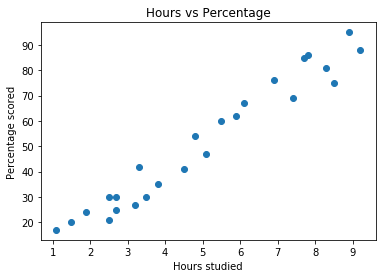

In [71]:
plt.scatter(x, y)
plt.ylabel('Percentage scored')
plt.xlabel('Hours studied')
plt.title('Hours vs Percentage')
plt.show()

 From the above scatter plot ,it can be observed that there exist a **positive linear relationship between the number of hours studied and percentage of score**


#### BOX PLOT:

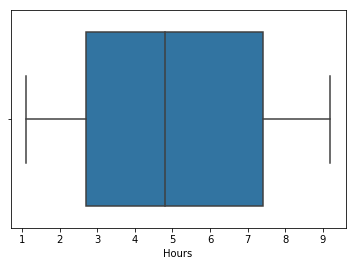

In [16]:
sns.boxplot(x)

From the above box plot, it is observed that there are no outliers for the predictor variable.The minimum and the maximum number of hours the students study are 1.1 and 9.3 respectively 

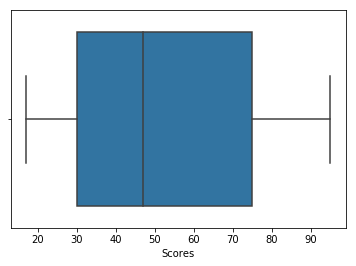

In [17]:
sns.boxplot(y)

From the above box plot, it is observed that there are no outliers for the dependent variable.The minimum and the maximum percentage scored by the students are 17% and 94% respectively.It is observed that the scores are positively skewed.

#### PREPARING THE DATA:

###### Splitting the Data into Training and Testing Sets:

Now we will split our data into training and testing sets. Using the training set, we’ll build the model and perform the model on the testing set. We’ll divide the training and testing sets into a 80% and 20% ratio, respectively.

In [52]:
x= data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size = 0.8,test_size= 0.2, random_state = 0)

In [54]:
x_train.shape

(20, 1)

In [55]:
x_test.shape

(5, 1)

### Training the Algorithm:

In [57]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
model = regressor.fit(x_train,y_train) 

print("Training complete.\n")

print("The estimates of the parameters are:")
print("The regression coefficient of the model is",regressor.coef_)
print("The constant value of the model is",regressor.intercept_)

Training complete.

The estimates of the parameters are:
The regression coefficient of the model is [9.91065648]
The constant value of the model is 2.018160041434669


The fitted regression model is 

**SCORES= 2.018160+ 9.91065648* HOURS. **

The sign of the regression coefficient of HOURS is positive which means when number of study hours increases the score will also increase. That is when the independent variable increases the mean of the dependent variable increases.

The intercept term is equal to 2.018160 which is the average score when the regressor is considered to be zero( 0 hour)

The coefficient for HOURS is equal to 9.91065 which implies that when the students increases his studying hours by one, his Score will increase by 9.91065%


### Visualising the fitted line to train data set

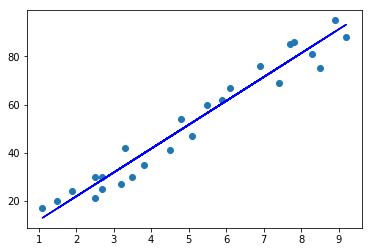

In [69]:
import matplotlib.pyplot as plt
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,'b');
plt.show()

From the above plot, it can be observed that all the points lies around the regression line which implies that the model is a good fit.

### Prediction:

In [72]:
# Predicting the scores
y_pred = regressor.predict(x_test) 
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [62]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


The above values are the actual and predicted scores of the students.

In [63]:
hours = 9.25
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


It can be predicted that **if the student studies for 9.25 hours, the student will score 93.69%**

In [65]:
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)
print("The r2 score of the model is",r)

The r2 score of the model is 0.9454906892105355


The R square value is 0.94 which implies that **94% of the total variation in the scores is explained the number of hours the students study**. Hence the model is a **good fit**

### Evaluating the model:

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [66]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.18385989900298


##### THANK YOU !!!